<a href="https://colab.research.google.com/github/pulkit-singhall/sms_spam_classifier/blob/main/sms_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Embedding
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/SMS Spam/Spam_SMS.csv")
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.shape

(5574, 2)

In [ ]:
y = list(df['Class'])

for i in range(len(y)):
  if y[i] == 'ham':
    y[i] = 0
  else:
    y[i] = 1

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text

In [92]:
x = df['Message']
x = x.apply(lambda x: x.lower()) #lower case
x = x.apply(lambda x:remove_punctuation(x)) #regex
x = list(x)

In [ ]:
tokenizer = Tokenizer(oov_token="<nothing>")
tokenizer.fit_on_texts(x)

word_index = tokenizer.word_index
vocab = len(word_index)
print(vocab)

9658


In [ ]:
seq = tokenizer.texts_to_sequences(x)

tot_sms = len(seq)
max_len = max([len(i) for i in seq])
print(tot_sms,max_len)

5574 171


In [ ]:
padded_seq = pad_sequences(seq,padding="post",maxlen=max_len)
padded_seq

array([[  47,  442, 4395, ...,    0,    0,    0],
       [  48,  312, 1407, ...,    0,    0,    0],
       [  51,  461,   10, ...,    0,    0,    0],
       ...,
       [9655,   62,   10, ...,    0,    0,    0],
       [   6,  507,  111, ...,    0,    0,    0],
       [2591,   42,  474, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_seq, y, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = Sequential()

model.add(Embedding(vocab+1,16,input_shape=(max_len,)))
model.add(LSTM(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 171, 16)             │         154,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 32)                  │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,849 (628.32 KB)

 Trainable params: 160,849 (628.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.8589 - loss: 56.5172 - val_accuracy: 0.8556 - val_loss: 0.4670
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.8659 - loss: 0.4568 - val_accuracy: 0.8556 - val_loss: 0.4502
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.8747 - loss: 0.4295 - val_accuracy: 0.8556 - val_loss: 0.4377
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.8610 - loss: 0.4331 - val_accuracy: 0.8556 - val_loss: 0.4288
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8614 - loss: 0.4222 - val_accuracy: 0.8556 - val_loss: 0.4226
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.8728 - loss: 0.4047 - val_accuracy: 0.8556 - val_loss: 0.4185
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.8603 - loss: 0.4183 - val_accuracy: 0.8556 - val_loss: 0.4160
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.8709 - loss: 0.3941 -

In [ ]:
model2 = Sequential()

model2.add(Embedding(vocab+1,16,input_shape=(max_len,)))
model2.add(LSTM(32, activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation="sigmoid"))

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ (None, 171, 16)             │         154,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ (None, 32)                  │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,849 (628.32 KB)

 Trainable params: 160,849 (628.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

history2 = model2.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.8626 - loss: 0.5153 - val_accuracy: 0.8556 - val_loss: 0.4151
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.8755 - loss: 0.3833 - val_accuracy: 0.8556 - val_loss: 0.4138
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.8600 - loss: 0.4115 - val_accuracy: 0.8556 - val_loss: 0.4183
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.8768 - loss: 0.3817 - val_accuracy: 0.8556 - val_loss: 0.4131
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.8626 - loss: 0.4081 - val_accuracy: 0.8556 - val_loss: 0.4129
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 28s 144ms/step - accuracy: 0.8695 - loss: 0.3909 - val_accuracy: 0.8556 - val_loss: 0.4138
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.8707 - loss: 0.3907 - val_accuracy: 0.8556 - val_loss: 0.4135
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - accuracy: 0.8628 - loss: 0.4053 

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

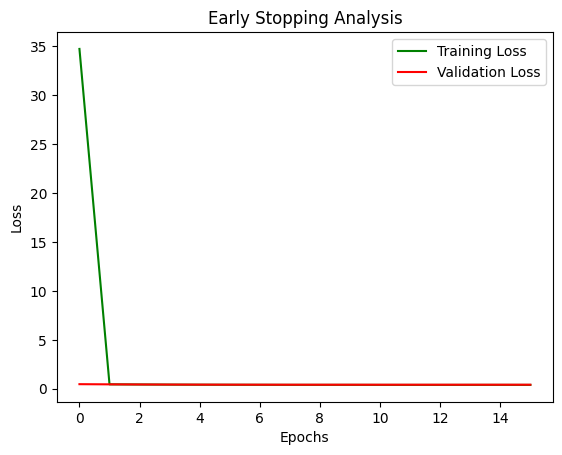

In [ ]:
plt.plot(loss, color = "green", label = "Training Loss")
plt.plot(val_loss, color = "red", label = "Validation Loss")
plt.title("Early Stopping Analysis")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

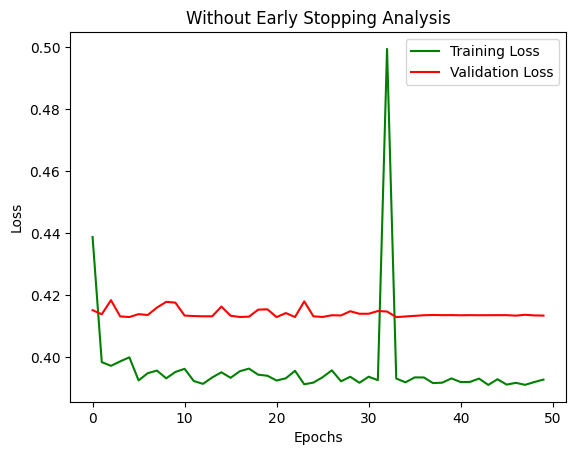

In [ ]:
plt.plot(loss2, color = "green", label = "Training Loss")
plt.plot(val_loss2, color = "red", label = "Validation Loss")
plt.title("Without Early Stopping Analysis")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
def classify(val):
  if(val>0.5):
    return "spam"
  return "ham"

In [ ]:
def tokeniseSMS(sms):
  sms = sms.lower()
  sms = remove_punctuation(sms)
  seq = tokenizer.texts_to_sequences([sms])
  padded_seq = pad_sequences(seq,padding="post",maxlen=max_len)
  return padded_seq

In [ ]:
test_sms = [
    "Please call our customer service representative on FREEPHONE as you have WON a guaranteed £1000 cash or £5000 prize!",
    "TheMob> Check out our newest selection of content, Games, Tones, Gossip, babes and sport, Keep your mobile fit and funky text WAP to",
    "Thanks for your Ringtone Order, Reference. You will be charged GBP 4 per week. You can unsubscribe at anytime by calling customer services on",
    "You have an important customer service announcement. Call FREEPHONE now!",
    "Cool, text me when you're ready",
    "No it's waiting in e car dat's bored wat. Cos wait outside got nothing 2 do. At home can do my stuff or watch tv wat.",
    "That's very rude, you on campus?",
    "Did you hear about the new Divorce Barbie? It comes with all of Ken's stuff!"
]

seq_test_sms = []

for sms in test_sms:
  # print(sms)
  seq_test_sms.append(tokeniseSMS(sms))
  # print(tokeniseSMS(sms))

seq_test_sms = np.array(seq_test_sms)
seq_test_sms[0]

array([[ 105,   17,   90,  222,  218,  976,   19, 1173,   74,    4,   18,
         177,    5,  249,  336,  175,   28,  574,  143,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [93]:
for sms in seq_test_sms:
  prediction = model.predict(sms)
  print(prediction)
  print(classify(prediction[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.14593056]]
ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.14593124]]
ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.1459315]]
ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.14592944]]
ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.14592914]]
ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.14593197]]
ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.14592914]]
ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[0.14592996]]
ham


In [ ]:
model.save("sms_spam_model.keras")